In the following example we'll use the infrequent version of metadynamics on the S<sub>N</sub>2 example. So bias depostion is slowed down, in the hope that we don't corrupt the transition state. We also use the simple 1D CV that have established earlier.

We plot both the acceleration factor ($\alpha$) as well as the scaled "hypertime" $t_\mathrm{hyper} = \alpha t_\mathrm{MD}$.

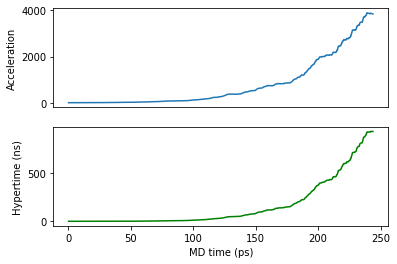

Reaction time:  937.1072338353334 ns


In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.loadtxt('colvar', skiprows=1, usecols=0)
alpha = np.loadtxt('colvar', skiprows=1, usecols=5)

plt.subplot(2, 1, 1)
plt.plot(t,alpha)
plt.ylabel("Acceleration")
plt.xticks([])

plt.subplot(2, 1, 2)
plt.plot(t,alpha*t/1000,'g')
plt.xlabel("MD time (ps)")
plt.ylabel("Hypertime (ns)")

plt.show()

print("Reaction time: ", np.max(alpha*t/1000), "ns")

This time is not incongruent with the rate estimate in example 2 and Poisson statistics. Still, we'll need much more data points to produce a rate estimate as well.

But did we succeed in keeping the TS bias-free? Let's use the <code>sum_hills</code> utility of PLUMED to obtain the full bias at time of stopping.

<code>plumed sum_hills --hills HILLS  --spacing 0.01 --negbias --min -3 --max 3</code>

Which we can plot:

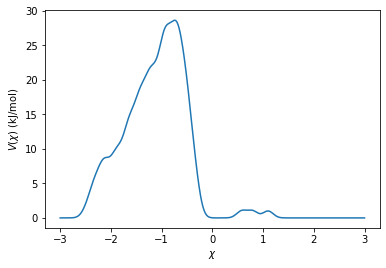

In [2]:
cv = np.loadtxt('negativebias.dat', skiprows=5, usecols=0)
bias = np.loadtxt('negativebias.dat', skiprows=1, usecols=1)

plt.plot(cv,-bias)
plt.xlabel("$\chi$")
plt.ylabel("$V (\chi)$ (kJ/mol)")

plt.show()

This seems to have worked!